<a href="https://colab.research.google.com/github/AngelB26/Public/blob/main/Ensembling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('/content/train_loan(1).csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#missing value handling

In [9]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
#missing values in 4 categorical columns and  3 numerical columns

In [12]:
#numerical-mean/median
#categorical -mode

In [13]:
#remove id column

In [14]:
data=data.drop('Loan_ID',axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [17]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [18]:
data['Gender']=data['Gender'].fillna('mode')

In [19]:
data['Married']=data['Married'].fillna('mode')

In [20]:
data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [21]:
data['Dependents']=data['Dependents'].fillna(data['Dependents']).mode()[0]

In [22]:
data['Self_Employed']=data['Self_Employed'].fillna('mode')

<function matplotlib.pyplot.show(close=None, block=None)>

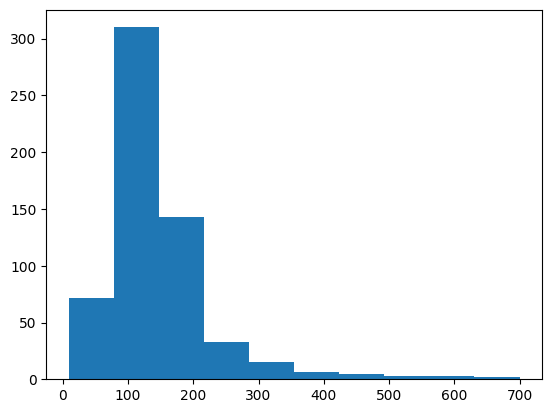

In [23]:
plt.hist(data['LoanAmount'])
plt.show

In [24]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

<function matplotlib.pyplot.show(close=None, block=None)>

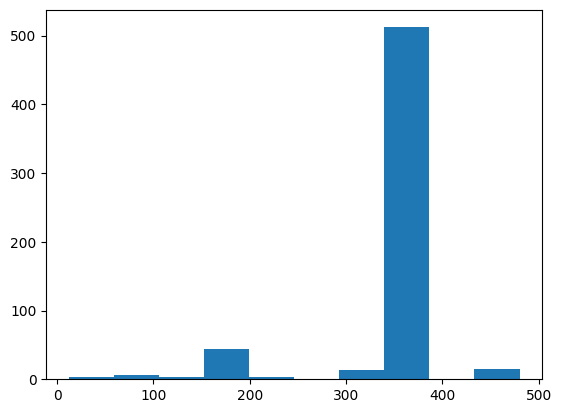

In [25]:
plt.hist(data['Loan_Amount_Term'])
plt.show

In [26]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

<function matplotlib.pyplot.show(close=None, block=None)>

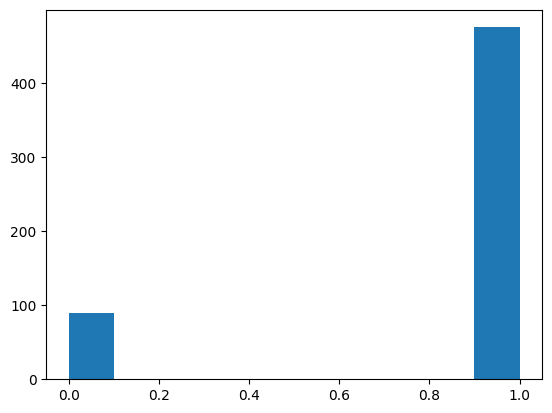

In [27]:
plt.hist(data['Credit_History'])
plt.show

In [28]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [29]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
#now no missing values
#check for outliers

<function matplotlib.pyplot.show(close=None, block=None)>

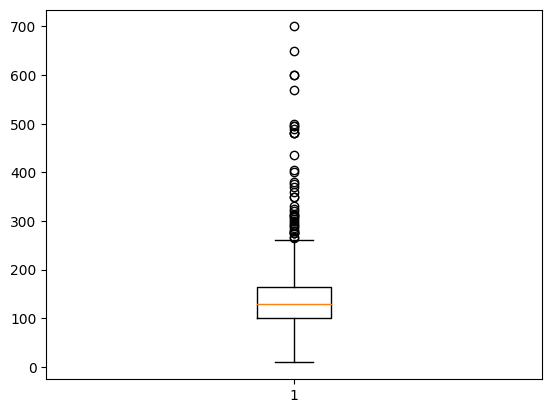

In [31]:
plt.boxplot(data['LoanAmount'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

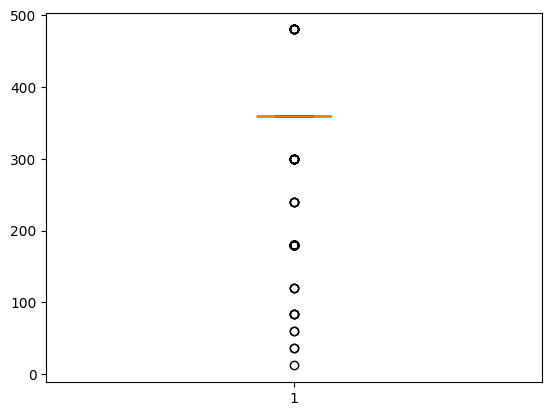

In [32]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

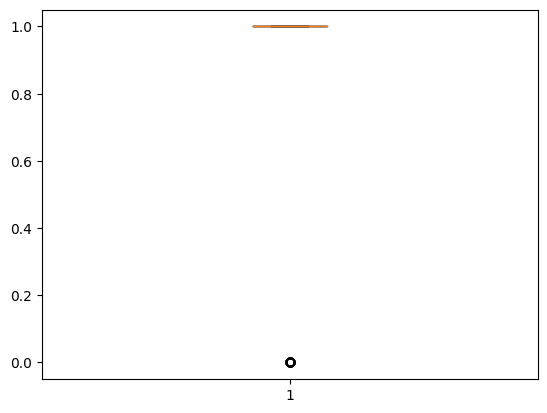

In [33]:
plt.boxplot(data['Credit_History'])
plt.show

In [34]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [35]:
y=data['Loan_Status']
x=data[['ApplicantIncome' ,	'CoapplicantIncome', 	'LoanAmount', 	'Loan_Amount_Term', 	'Credit_History']]

In [36]:
x=pd.get_dummies(x)

In [37]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0


In [38]:
#scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler


In [40]:
mn=MinMaxScaler()

In [41]:
x.loc[:,['ApplicantIncome' ,	'CoapplicantIncome', 	'LoanAmount', 	'Loan_Amount_Term', 	'Credit_History']]=mn.fit_transform(x[['ApplicantIncome' ,	'CoapplicantIncome', 	'LoanAmount', 	'Loan_Amount_Term', 	'Credit_History']])

In [42]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.070489,0.000000,0.198860,0.74359,1.0
1,0.054830,0.036192,0.172214,0.74359,1.0
2,0.035250,0.000000,0.082489,0.74359,1.0
3,0.030093,0.056592,0.160637,0.74359,1.0
4,0.072356,0.000000,0.191027,0.74359,1.0


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [45]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

In [46]:
clf=DecisionTreeClassifier(criterion='entropy')

In [47]:
#fit the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
y_pred=clf.predict(x_test)

In [49]:
from sklearn import metrics

In [50]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7337662337662337


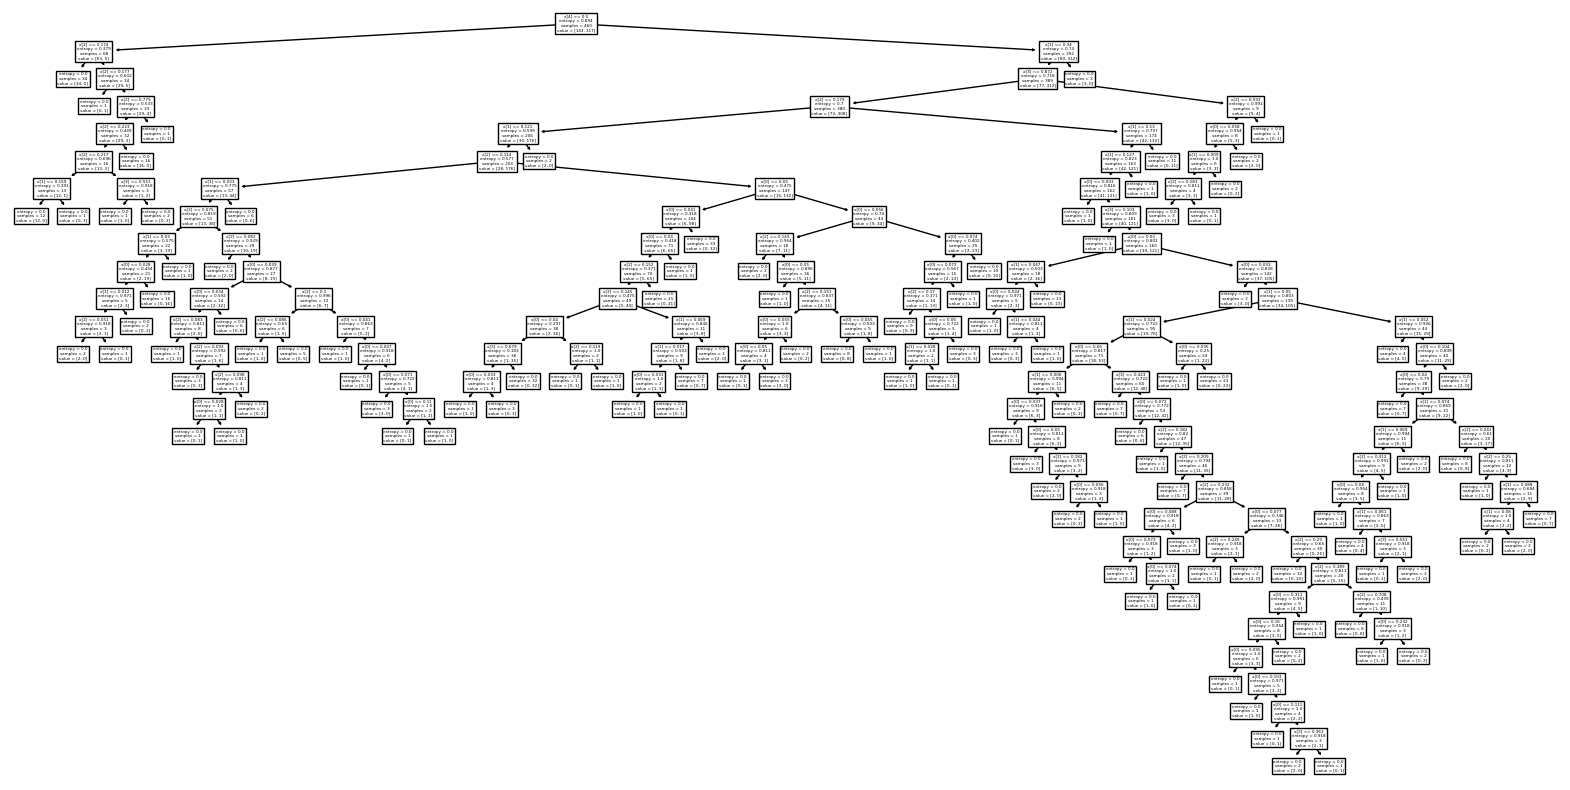

In [51]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf)
plt.show()

In [52]:
#Ensembling

In [53]:
#random Forest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [54]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7857142857142857


In [55]:
#Bagging
from sklearn.ensemble import BaggingClassifier

In [56]:
tree=DecisionTreeClassifier()

In [57]:
bagging_clf=BaggingClassifier(base_estimator=tree,n_estimators=100,random_state=42)

In [58]:
bagging_clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [59]:
y_pred=bagging_clf.predict(x_test)

In [60]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7662337662337663


In [61]:
#bagging with svm

In [62]:
from sklearn.svm import SVC

In [63]:
bagging_clf2=BaggingClassifier(base_estimator=SVC(),n_estimators=100,random_state=42)

In [64]:
bagging_clf2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=42)

In [65]:
y_pred=bagging_clf2.predict(x_test)

In [66]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7922077922077922


In [67]:
#Boosting

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
ada_boost_clf=AdaBoostClassifier(n_estimators=100)
ada_boost_clf.fit(x_train,y_train)
y_pred=ada_boost_clf.predict(x_test)
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7532467532467533


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf=GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)
grad_boost_clf.fit(x_train,y_train)
y_pred=grad_boost_clf.predict(x_test)
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7727272727272727


In [89]:
 import xgboost as xgb

In [91]:
xg_boost_clf=xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)

In [93]:
xg_boost_clf. fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [94]:
y_pred=xg_boost_clf.predict(x_test)